# Handling missing data

- Real world data might be impure, it might have missing data.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# load data
df = pd.read_csv('data/weather_data_missing_values.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [5]:
# check NA values -> returns a dataframe with boolean values at cells
df.isna()

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


## Fill missing data cells with values - `df.fillna()` method

- Fills the `NaN` values with given data.

- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)

- Returns a new dataframe if `inplace=True` argument is not specified.

> **STRATEGY:** Fill every missing data cell with a single value

In [6]:
# fill with a single value
df.fillna(0)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,0
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


> **STRATEGY:** Fill missing data column wise

In [7]:
# specify what to fill for each column -> using a dictionary
df.fillna({
    'temperature': 20,
    'windspeed': 0,
    'event': 'No Event'
})

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,20.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,20.0,7.0,No Event
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,20.0,0.0,Sunny
6,1/9/2017,20.0,0.0,No Event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


> **STRATEGY:** Fill missing data using **Forward Fill technique**.

- The value at a cell is carry forwarded to the next cell, if it has missing data.

- 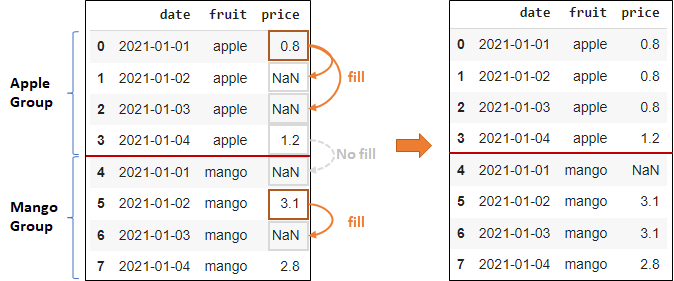

In [9]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [8]:
df.fillna(method='ffill')

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,9.0,Sunny
2,1/5/2017,28.0,9.0,Snow
3,1/6/2017,28.0,7.0,Snow
4,1/7/2017,32.0,7.0,Rain
5,1/8/2017,32.0,7.0,Sunny
6,1/9/2017,32.0,7.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


> **STRATEGY**: Use Backward Fill

In [10]:
df.fillna(method='bfill')

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,28.0,9.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,32.0,7.0,Rain
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,34.0,8.0,Sunny
6,1/9/2017,34.0,8.0,Cloudy
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


> **STRATEGY:** Fill with an aggregated value

- You might want to use either mean, median or mode for filling in missing data.

In [13]:
mean_temperature = df['temperature'].mean()
central_windspeed = df['windspeed'].median()
most_probable_event = df['event'].mode()[0]
print(mean_temperature)
print(central_windspeed)
print(most_probable_event)
df.fillna({
    'temperature': mean_temperature,
    'windspeed': central_windspeed,
    'event': most_probable_event
})

33.2
8.0
Sunny


,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,33.2,9.0,Sunny
2,1/5/2017,28.0,8.0,Snow
3,1/6/2017,33.2,7.0,Sunny
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,33.2,8.0,Sunny
6,1/9/2017,33.2,8.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


### `df.interpolate()`

> **STRATEGY:** Use an interpolated value

- Interpolation is basically like a value in between previous and next value.

- Linear Interpolation:
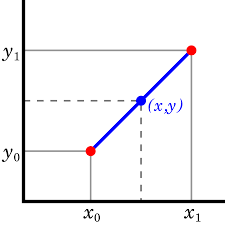

- Time-based Interpolation:
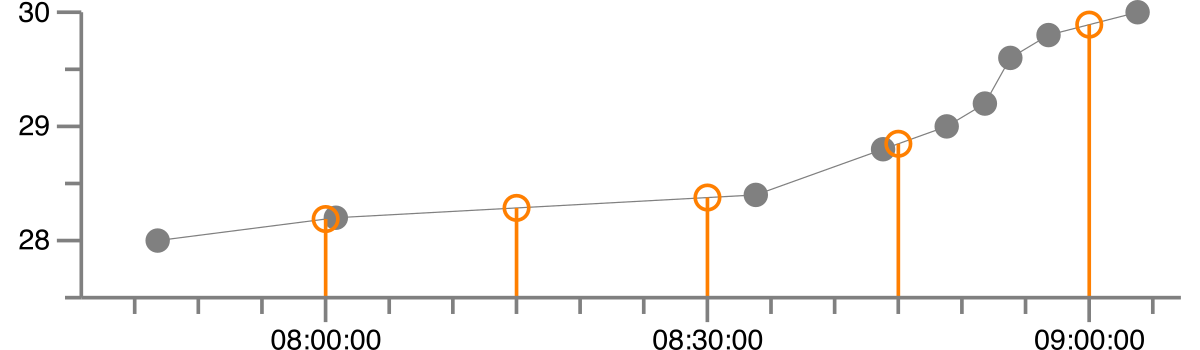

In [14]:
# linear interpolation (default)
print(df)
df.interpolate()

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017          NaN        9.0   Sunny
2   1/5/2017         28.0        NaN    Snow
3   1/6/2017          NaN        7.0     NaN
4   1/7/2017         32.0        NaN    Rain
5   1/8/2017          NaN        NaN   Sunny
6   1/9/2017          NaN        NaN     NaN
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


,day,temperature,windspeed,event
0,1/1/2017,32.000000,6.00,Rain
1,1/4/2017,30.000000,9.00,Sunny
2,1/5/2017,28.000000,8.00,Snow
3,1/6/2017,30.000000,7.00,NaN
4,1/7/2017,32.000000,7.25,Rain
5,1/8/2017,32.666667,7.50,Sunny
6,1/9/2017,33.333333,7.75,NaN
7,1/10/2017,34.000000,8.00,Cloudy
8,1/11/2017,40.000000,12.00,Sunny


- For time-based interpolation, a datetime object must be the index column

In [19]:
# time-based interpolation
df['day'] = pd.to_datetime(df['day'])
new_df = df.set_index('day')
new_df.interpolate(method='time')

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


## Drop missing data - `df.dropna()` method

> **STRATEGY:** Drop records having missing values

In [21]:
# original dataframe
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [22]:
# drop all rows having missing values
df.dropna()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [23]:
# drop rows where entire row has missing values
df.dropna(how='all')

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [31]:
# drop rows based on a threshold
df.dropna(thresh=3)
# ROWS WITH >= 3 non-missing value will NOT be dropped

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
4,2017-01-07,32.0,NaN,Rain
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### `df.replace()` function

- This function helps us to replace certain set of values with another set of values.

- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace)

- Consider the following data:

In [33]:
df = pd.read_csv('data/weather_data_missing_values_replace.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


- Assume that `-99999` and `-88888` indicate that data is missing in that cell.
    
    - `0` in `event` column indicates a missing value.

In [34]:
# using replace() to replace a single value
df.replace(-99999, np.NaN)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,-88888.0,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [37]:
# replacing multiple values
df.replace([-99999, -88888], value=np.NaN)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [38]:
# mention stuff to replace column-wise
df.replace({
    'temperature': [-99999],
    'windspeed': [-99999, -88888],
    'event': [0]
}, np.NaN)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [41]:
# mention stuff to replace column-wise and replacement values column-wise
df.replace({
    'temperature': [-99999],
    'windspeed': [-99999, -88888],
    'event': ['0']
}, {
    'temperature': 28,
    'windspeed': 0,
    'event': 'Sunny'
})

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,28,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,28,7,Sunny
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Sunny


In [44]:
# mentioning a mapping of what to replace with
mappings = {
    -99999: np.NaN,
    '0': 'Rainy'
}
df.replace(mappings)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,Rainy
4,1/5/2017,32.0,-88888.0,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,Rainy


### Regex replacement in `replace()` method

- Consider the following dataframe

In [46]:
df = pd.DataFrame({
    'city': ['london', 'paris'],
    'temperature': ['70 F', '25C']
})
df

,city,temperature
0,london,70 F
1,paris,25C


In [47]:
# replace F, C (units) with blank char('')
df.replace('[A-Za-z ]', '', regex=True)

,city,temperature
0,,70
1,,25
